In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Break Powers:  [ 5406.   9341.  25461.  57102.5] kW


Text(0, 0.5, 'BHP [MW]')

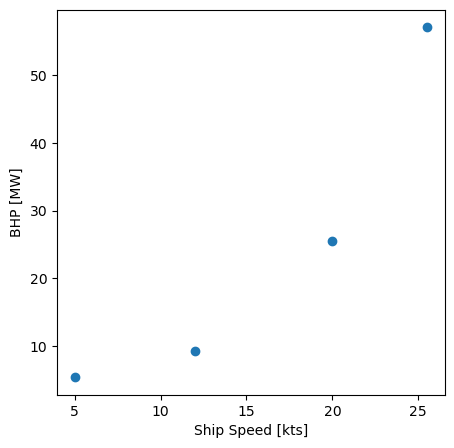

In [2]:
speeds = np.array([5, 12, 20, 25.5])
duration_frac = np.array([.2, .6, .15, .05])
num_days_underway = 183
break_powers = np.array([5406, 9341, 25461, (62154 + 52051)/2]) # kW
print('Break Powers: ', break_powers, 'kW')
#print('Break Powers: ', np.round(break_powers*1.34102, 2), 'HP')
plt.figure(figsize=(5,5))
plt.scatter(speeds, break_powers/1000)
plt.xlabel('Ship Speed [kts]')
plt.ylabel('BHP [MW]')

Text(0, 0.5, 'Days per Year')

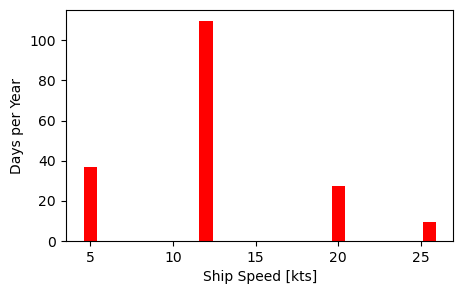

In [3]:
plt.figure(figsize=(5,3))
plt.bar(speeds, num_days_underway*duration_frac, color='red')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Days per Year')

For the following powers: [ 5406.   9341.  25461.  57102.5]
The MCR is                [  9.467  16.358  44.588 100.   ] %
mdots: [0.69377    1.15984083 2.4541575  4.58406181] kg/s
m_steam: [ 2193.8672448 11003.0852304  5820.4762596  3623.975901 ] Ton
Total fuel used in the propulsion fuel rate is: 22641.404635799998 Ton


Text(0.5, 1.0, 'Total Fuel Used by Propulsion: 22641.4 Ton')

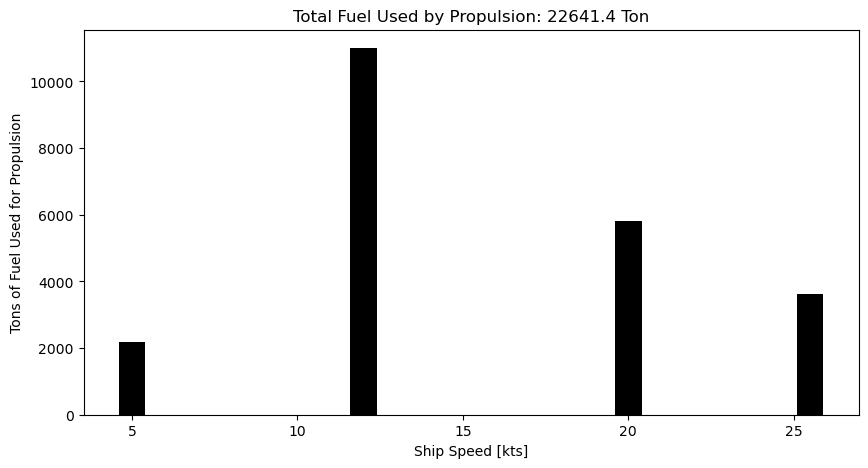

In [4]:
# Steam Section 
sfc_100_steam = 289 # g/kwhr
sfc_100_ssg = 242
shift = sfc_100_steam - sfc_100_ssg
fraction_load = break_powers / break_powers[-1]
print(f'For the following powers: {break_powers}')
print(f'The MCR is                {np.round(fraction_load*100, 3)} %')
sfc_steam = np.array([415, 400, 300, 242]) + shift

# calculate the fuel rates at certain speeds 
mdot_steam = sfc_steam*(1/60**2)*(1/1000)*break_powers
print(f'mdots: {mdot_steam} kg/s')

m_steam_annual = mdot_steam*num_days_underway*duration_frac*24*60**2
print(f'm_steam: {m_steam_annual/1000} Ton')
mtot_steam = np.sum(m_steam_annual)

print(f'Total fuel used in the propulsion fuel rate is: {mtot_steam/1000} Ton')

plt.figure(figsize=(10,5))
plt.bar(speeds, m_steam_annual/1000, color='black')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Tons of Fuel Used for Propulsion')
plt.title(f'Total Fuel Used by Propulsion: {np.round(mtot_steam/1000, 2)} Ton')



In [5]:
# As-is electrical generation 

P_avg_el = 4747 # kW
P_WB = 7272 # kW

num_steam_elec = 5
num_diesel_elec = 2

# operation powers
P_steam_elec_100 = 2500
P_diesel_elec_100 = 2000

# total_installed_electric_capacity = num_steam_elec*P_steam_elec_100 + num_diesel_elec*P_diesel_elec_100
# print(f'Total installed electrical power: {total_installed_electric_capacity} kW')

# P_steam_elec_avg = (P_steam_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per steam engine: {P_steam_elec_avg} kW')
# MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
# print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')
# sfc_steam_elec = 325 + shift
# print(f'sfc for steam electric generator: {sfc_steam_elec}')
# # total fuel mass used by the 5 steam electric generators
# m_steam_elec = sfc_steam_elec/(1000*60**2)*P_steam_elec_avg*num_days_underway*24*60**2
# print(f'Total fuel used to supply steam electric power generator: {m_steam_elec/1000} Ton')

# print('\n----------------')
# P_diesel_elec_avg = (P_diesel_elec_100/total_installed_electric_capacity)*P_avg_el
# print(f'Power per diesel engine: {P_diesel_elec_avg} kW')
# MCR_diesel_elec_avg = P_diesel_elec_avg/P_diesel_elec_100
# print(f'MCR for diesel electric power plant at average load: {MCR_diesel_elec_avg}')

endurance_percent = 0.9
winter_battle_percent = 1- endurance_percent

# Endurance speed section 
P_steam_elec_avg = P_avg_el/(num_steam_elec-1)
print(f'Power per steam engine: {P_steam_elec_avg} kW')
MCR_steam_elec_avg = P_steam_elec_avg/P_steam_elec_100
print(f'MCR for steam electric power plant at average load: {MCR_steam_elec_avg}')

sfc_steam_elec_avg = 280 + shift
print(f'sfc for steam electric generator during endurance operation: {sfc_steam_elec_avg}')
m_steam_elec_avg = sfc_steam_elec_avg/(1000*60**2)*P_steam_elec_avg*(num_days_underway*endurance_percent)*24*60**2
print(f'Total fuel used to supply steam electric power generator at endurance: {m_steam_elec_avg/1000} Ton')

print('\n-----')
# winter battle section 
P_steam_elec_WB = P_WB/(num_steam_elec-1)
print(f'Power per steam engine for WB: {P_steam_elec_WB} kW')
MCR_steam_elec_WB = P_steam_elec_WB/P_steam_elec_100
print(f'MCR for steam electric power plant at WB load: {MCR_steam_elec_WB}')

sfc_steam_elec_WB = 260 + shift
print(f'sfc for steam electric generator during WB operation: {sfc_steam_elec_WB}')
m_steam_elec_WB = sfc_steam_elec_WB/(1000*60**2)*P_steam_elec_WB*(num_days_underway*winter_battle_percent)*24*60**2
print(f'Total fuel used to supply steam electric power generator WB: {m_steam_elec_WB/1000} Ton')

print('\n-----')
print(f'Total fuel used by electric generators annually: {(m_steam_elec_WB + m_steam_elec_avg)/1000} Ton ')

print('\n-----')
m_grand_total_steam = m_steam_elec_WB + m_steam_elec_avg + mtot_steam
print(f'Grand Total fuel used by ship: {(m_grand_total_steam)/1000} Ton ')

Power per steam engine: 1186.75 kW
MCR for steam electric power plant at average load: 0.4747
sfc for steam electric generator during endurance operation: 327
Total fuel used to supply steam electric power generator at endurance: 1533.9522258000004 Ton

-----
Power per steam engine for WB: 1818.0 kW
MCR for steam electric power plant at WB load: 0.7272
sfc for steam electric generator during WB operation: 307
Total fuel used to supply steam electric power generator WB: 245.12893919999996 Ton

-----
Total fuel used by electric generators annually: 1779.0811650000003 Ton 

-----
Grand Total fuel used by ship: 24420.485800799997 Ton 


In [6]:
# Pollution Section 

CO2_frac = .85*44/12
print(f'CO2_fac: {CO2_frac}')
total_CO2_emission_steam = m_grand_total_steam*CO2_frac
print(f'Emitted CO2: {total_CO2_emission_steam/1000} Ton')

SOx_frac = .01*(32+32)/32
print(f'SOx_fac: {SOx_frac}')
total_SOx_emission_steam = m_grand_total_steam*SOx_frac
print(f'Emitted SOx: {total_SOx_emission_steam/1000} Ton')

# NOx section 

print('\n----------')
print('NOx Section\n')
print(f'Recal the MCR for the main engines is {fraction_load*100} %')
noxers = fraction_load*100*0.16 + 2
print(f'noxers: {noxers}')

mass_nox_primary = noxers*m_steam_annual/1000**2 # mass of nox in Ton
print('Mass of NOx emission in Tons: ', mass_nox_primary)
total_NOx_emission = sum(mass_nox_primary)
print(f'Mass of NOx emitted total from propulstion: {total_NOx_emission} Ton')


print('\n-----')
# NOx emitted by the electic system 
# recall for the WB mass, the MCR = 0.727, and for the standard operation, MCR = 0.475
MCR_elec = np.array([MCR_steam_elec_avg, MCR_steam_elec_WB])
noxers_elec = MCR_elec*100*0.16 + 2
mass_used_elec = np.array([m_steam_elec_avg, m_steam_elec_WB])
mass_nox_elec = noxers_elec*mass_used_elec/1000**2 # mass of nox in Ton
print('electric MCRs: ', MCR_elec)
print('electric noxers: ', noxers_elec)
print('Mass of NOx emitted by electric generation in Ton: ', mass_nox_elec)
total_NOx_emission_elec = sum(mass_nox_elec)
print(f'Mass of NOx emitted total from electric: {total_NOx_emission_elec} Ton')

print('\n------')
print('Grand Total NOx in Ton: ', total_NOx_emission_elec+total_NOx_emission)

CO2_fac: 3.1166666666666667
Emitted CO2: 76110.51407915998 Ton
SOx_fac: 0.02
Emitted SOx: 488.4097160159999 Ton

----------
NOx Section

Recal the MCR for the main engines is [  9.4671862   16.35830305  44.58824044 100.        ] %
noxers: [ 3.51474979  4.61732849  9.13411847 18.        ]
Mass of NOx emission in Tons:  [ 7.71089444 50.80485889 53.16491971 65.23156622]
Mass of NOx emitted total from propulstion: 176.91223926715767 Ton

-----
electric MCRs:  [0.4747 0.7272]
electric noxers:  [ 9.5952 13.6352]
Mass of NOx emitted by electric generation in Ton:  [14.7185784   3.34238211]
Mass of NOx emitted total from electric: 18.060960508776002 Ton

------
Grand Total NOx in Ton:  194.97319977593367


Text(0.5, 1.0, 'Total NOx Emitted by Steam Propulsion: 176.91 Ton')

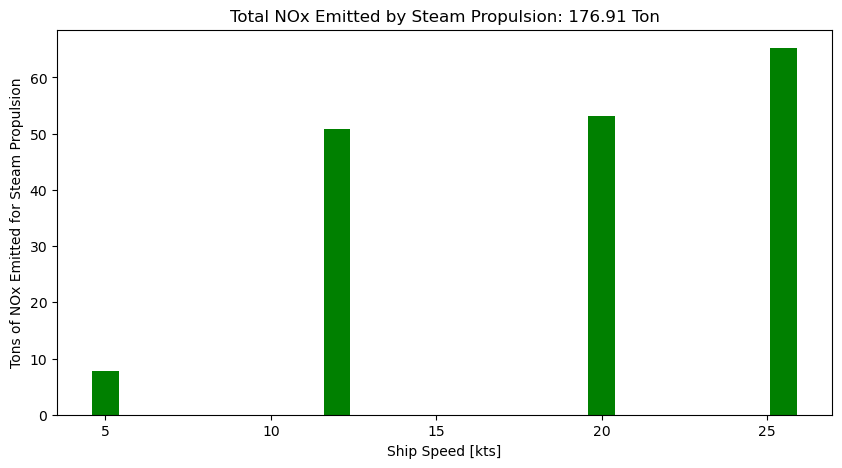

In [7]:
plt.figure(figsize=(10,5))
plt.bar(speeds, mass_nox_primary, color='green')
plt.xlabel('Ship Speed [kts]')
plt.ylabel('Tons of NOx Emitted for Steam Propulsion')
plt.title(f'Total NOx Emitted by Steam Propulsion: {np.round(sum(mass_nox_primary), 2)} Ton')

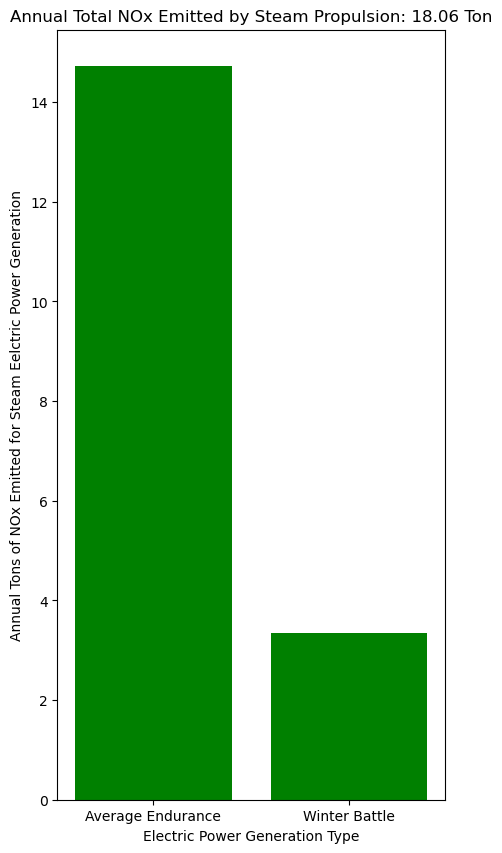

In [8]:
DayOfWeekOfCall = [1,2]

LABELS = ["Average Endurance", "Winter Battle"]
plt.figure(figsize=(5, 10))
plt.bar(DayOfWeekOfCall, mass_nox_elec, align='center', color='green')
plt.xticks(DayOfWeekOfCall, LABELS)
plt.xlabel('Electric Power Generation Type')
plt.ylabel('Annual Tons of NOx Emitted for Steam Eelctric Power Generation')
plt.title(f'Annual Total NOx Emitted by Steam Propulsion: {np.round(sum(mass_nox_elec), 2)} Ton')
plt.show()

In [11]:
MCR_war = np.zeros_like(break_powers)
sfc_war = np.zeros_like(break_powers)
mdot_war = np.zeros_like(break_powers)
m_war_annual = np.zeros_like(break_powers)

In [13]:
# Speed 0
index = 0
P_B = break_powers[index]
vs = speeds[index]
print(f'The break power at vs = {vs} kts is PB = {P_B} kW')
P_war_100 = 5200 # kW max power of each Warstilla 31 V8 engine
MCR_war[index] = (P_B/2)/P_war_100
print(f'The MCR of each Warstilla engine is {MCR_war[index]*100} %')
sfc_war[index] = 175

mdot_war[index] = sfc_war[index]*(1/60**2)*(1/1000)*P_B
print(f'mdot: {mdot_war[index]} kg/s')

m_war_annual[index] = mdot_war[index]*num_days_underway*duration_frac[index]*24*60**2
print(f'm_war: {m_war_annual[index]/1000} Ton')


The break power at vs = 5.0 kts is PB = 5406.0 kW
The MCR of each Warstilla engine is 51.98076923076923 %
mdot: 0.2627916666666667 kg/s
m_war: 831.0103200000001 Ton
